# Exploración: historial_estados_academicos_estudiante_anonymized

Notebook para explorar el archivo de datos de Historial Estados Académicos Estudiante.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ydata_profiling import ProfileReport
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline


In [35]:
df = pd.read_parquet('../data/historial_estados_academicos_estudiante_anonymized.parquet')


In [36]:
print(f"Dimensiones: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")
print(f"\nMemoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Dimensiones: (616085, 21)
Número de filas: 616,085
Número de columnas: 21

Memoria utilizada: 576.66 MB


## Sobre Este Dataset

El dataset contiene 616,085 registros y 21 variables: 6 numéricas (1 int64, 5 float64), 13 categóricas (object) y 2 booleanas. Tamaño en memoria: 576.

Este volumen de datos nos proporciona una base sólida para identificar patrones de comportamiento y construir perfiles de estudiantes que permitan recomendaciones personalizadas de carga académica.


In [37]:
print("\nColumnas:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col} ({df[col].dtype})")



Columnas:
 1. PERIODO (int64)
 2. CODIGO_ESTUDIANTE (object)
 3. SEMESTRE_SEGUN_CREDITOS (object)
 4. MATRICULADO_PERIODO_ACTUAL (object)
 5. CODIGO_PROGRAMA_1 (object)
 6. PROGRAMA_1 (object)
 7. NIVEL_PROGRAMA_1 (object)
 8. CODIGO_PROGRAMA_2 (object)
 9. PROGRAMA_2 (object)
10. NIVEL_PROGRAMA_2 (object)
11. DESCRIPCION_ESTADO_RETIRO (object)
12. REINTEGRO_REINGRESO (object)
13. ESTADO_ACADEMICO_INICIAL (object)
14. PERIODO_ESTADO_ACADEMICO_INICIAL (float64)
15. ESTADO_ACADEMICO_FINAL (object)
16. PERIODO_ESTADO_ACADEMICO_FINAL (float64)
17. ENTRA_A_SUSPENSION (bool)
18. ENTRA_A_PRUEBA_ACADEMICA (bool)
19. SUSPENSIONES_ACUMULADAS (float64)
20. PRUEBAS_ACADEMICAS_ACUMULADAS (float64)
21. INCOMPLETOS_TOTALES_ACUMULADOS (float64)


In [38]:
df.head()


,PERIODO,CODIGO_ESTUDIANTE,SEMESTRE_SEGUN_CREDITOS,MATRICULADO_PERIODO_ACTUAL,CODIGO_PROGRAMA_1,PROGRAMA_1,NIVEL_PROGRAMA_1,CODIGO_PROGRAMA_2,PROGRAMA_2,NIVEL_PROGRAMA_2,...,REINTEGRO_REINGRESO,ESTADO_ACADEMICO_INICIAL,PERIODO_ESTADO_ACADEMICO_INICIAL,ESTADO_ACADEMICO_FINAL,PERIODO_ESTADO_ACADEMICO_FINAL,ENTRA_A_SUSPENSION,ENTRA_A_PRUEBA_ACADEMICA,SUSPENSIONES_ACUMULADAS,PRUEBAS_ACADEMICAS_ACUMULADAS,INCOMPLETOS_TOTALES_ACUMULADOS
0,201310,EST_00061114,5.47,SI,ISIS,Ingeniería de Sistemas y Computación,Pregrado,,None,Sin información,...,N/A,Normal,201220.0,Normal,201310.0,False,False,0.0,0.0,0.0
1,201020,EST_00055026,1.38,SI,DISO,Diseño,Pregrado,,None,Sin información,...,N/A,Primíparo,201020.0,Normal,201020.0,False,False,0.0,0.0,0.0
2,201510,EST_00068879,6.89,SI,DISO,Diseño,Pregrado,,None,Sin información,...,N/A,Normal,201420.0,Normal,201510.0,False,False,0.0,0.0,0.0
3,201220,EST_00047173,7.86,SI,IMEC,Ingeniería Mecánica,Pregrado,,None,Sin información,...,N/A,Normal,201210.0,Normal,201220.0,False,False,0.0,0.0,0.0
4,201810,EST_00088257,5.22,SI,ICIV,Ingeniería Civil,Pregrado,ADMI,Administración de Empresas,Pregrado,...,N/A,Normal,201720.0,Normal,201810.0,False,False,0.0,0.0,0.0


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616085 entries, 0 to 616084
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PERIODO                           616085 non-null  int64  
 1   CODIGO_ESTUDIANTE                 616085 non-null  object 
 2   SEMESTRE_SEGUN_CREDITOS           616085 non-null  object 
 3   MATRICULADO_PERIODO_ACTUAL        616085 non-null  object 
 4   CODIGO_PROGRAMA_1                 616085 non-null  object 
 5   PROGRAMA_1                        616085 non-null  object 
 6   NIVEL_PROGRAMA_1                  616085 non-null  object 
 7   CODIGO_PROGRAMA_2                 616085 non-null  object 
 8   PROGRAMA_2                        116811 non-null  object 
 9   NIVEL_PROGRAMA_2                  616085 non-null  object 
 10  DESCRIPCION_ESTADO_RETIRO         615989 non-null  object 
 11  REINTEGRO_REINGRESO               616085 non-null  o

## Tipos de Datos y Su Significado

Cada tipo de dato nos dice cómo podemos usar la variable:

- **object**: Texto o categorías. Útil para agrupar estudiantes por características cualitativas.
- **int64/float64**: Números que podemos sumar, promediar o usar en cálculos matemáticos.
- **bool**: Verdadero o falso. Perfecto para marcar eventos específicos (entró en suspensión, aprobó materia, etc.).

La combinación de estos tipos nos permite analizar tanto patrones cuantitativos (promedios, créditos) como cualitativos (programa académico, estado).


In [40]:
df.describe()


,PERIODO,PERIODO_ESTADO_ACADEMICO_INICIAL,PERIODO_ESTADO_ACADEMICO_FINAL,SUSPENSIONES_ACUMULADAS,PRUEBAS_ACADEMICAS_ACUMULADAS,INCOMPLETOS_TOTALES_ACUMULADOS
count,616085.000000,605782.000000,615927.000000,576733.000000,576733.000000,575229.000000
mean,201784.644630,201742.623523,201784.511858,0.049250,0.077389,0.004694
std,450.495551,452.869979,450.472721,0.287725,0.333738,0.076964
min,201010.000000,197410.000000,201010.000000,0.000000,0.000000,0.000000
25%,201410.000000,201320.000000,201410.000000,0.000000,0.000000,0.000000
50%,201810.000000,201720.000000,201810.000000,0.000000,0.000000,0.000000
75%,202210.000000,202120.000000,202210.000000,0.000000,0.000000,0.000000
max,202520.000000,202520.000000,202520.000000,9.000000,7.000000,5.000000


In [41]:
print("\nValores nulos por columna:")
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)
null_df = pd.DataFrame({'Nulos': null_counts, 'Porcentaje': null_pct})
print(null_df[null_df['Nulos'] > 0].sort_values('Nulos', ascending=False))



Valores nulos por columna:
                                   Nulos  Porcentaje
PROGRAMA_2                        499274       81.04
INCOMPLETOS_TOTALES_ACUMULADOS     40856        6.63
SUSPENSIONES_ACUMULADAS            39352        6.39
PRUEBAS_ACADEMICAS_ACUMULADAS      39352        6.39
PERIODO_ESTADO_ACADEMICO_INICIAL   10303        1.67
ESTADO_ACADEMICO_FINAL               158        0.03
PERIODO_ESTADO_ACADEMICO_FINAL       158        0.03
DESCRIPCION_ESTADO_RETIRO             96        0.02


## ¿Qué Hacer con los Datos Faltantes?

Los valores nulos nos obligan a tomar decisiones estratégicas:

**Cuando más del 50% de datos faltan:** La variable probablemente no aporta información útil para la mayoría de estudiantes. Es mejor descartarla que intentar llenar tantos huecos.

**Cuando faltan entre 10-50%:** Debemos investigar por qué faltan. ¿Es información que no se recolectaba antes? ¿No aplica para ciertos programas? La respuesta guía si imputamos, descartamos o creamos categorías especiales.

**Cuando faltan menos del 10%:** Generalmente podemos rellenar con valores típicos (la mediana para números, la moda para categorías) sin distorsionar significativamente el análisis.


## Análisis Univariado - Variables Categóricas

In [42]:
cat_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print(f"Variables categóricas encontradas: {len(cat_cols)}")
print(cat_cols)


Variables categóricas encontradas: 15
['CODIGO_ESTUDIANTE', 'SEMESTRE_SEGUN_CREDITOS', 'MATRICULADO_PERIODO_ACTUAL', 'CODIGO_PROGRAMA_1', 'PROGRAMA_1', 'NIVEL_PROGRAMA_1', 'CODIGO_PROGRAMA_2', 'PROGRAMA_2', 'NIVEL_PROGRAMA_2', 'DESCRIPCION_ESTADO_RETIRO', 'REINTEGRO_REINGRESO', 'ESTADO_ACADEMICO_INICIAL', 'ESTADO_ACADEMICO_FINAL', 'ENTRA_A_SUSPENSION', 'ENTRA_A_PRUEBA_ACADEMICA']


In [43]:
for col in cat_cols:
    value_counts = df[col].value_counts(dropna=False)
    value_pct = df[col].value_counts(normalize=True, dropna=False) * 100
    result_df = pd.DataFrame({
        'Conteo': value_counts,
        'Porcentaje': value_pct.round(2)
    })
    if len(result_df) > 20:
        print(f"\nMostrando top 20 de {len(result_df)} categorías:")
        print(result_df.head(20))
        print(f"\n... y {len(result_df) - 20} categorías más")
    else:
        print(result_df)
    print(f"\nTotal de categorías únicas: {len(result_df)}")
    print(f"Total de registros: {value_counts.sum():,}")




Mostrando top 20 de 101366 categorías:
                   Conteo  Porcentaje
CODIGO_ESTUDIANTE                    
EST_00056734           29         0.0
EST_00053471           29         0.0
EST_00030933           28         0.0
EST_00062351           28         0.0
EST_00045188           28         0.0
EST_00062357           28         0.0
EST_00048309           28         0.0
EST_00058170           27         0.0
EST_00050400           27         0.0
EST_00061506           27         0.0
EST_00025476           27         0.0
EST_00063450           27         0.0
EST_00062182           27         0.0
EST_00034608           27         0.0
EST_00026443           26         0.0
EST_00053743           26         0.0
EST_00060319           26         0.0
EST_00055849           26         0.0
EST_00049795           26         0.0
EST_00044267           26         0.0

... y 101346 categorías más

Total de categorías únicas: 101366
Total de registros: 616,085

Mostrando top 20 de 1874 categ

## Distribuciones Categóricas: Qué Revelan

Las gráficas de barras nos muestran si las categorías están balanceadas o sesgadas:

**Distribuciones muy desbalanceadas** (una categoría domina con >80%): La variable tiene poco poder discriminante. Casi todos los casos caen en la misma categoría, así que no nos ayuda a diferenciar perfiles.

**Distribuciones moderadamente desbalanceadas** (una categoría entre 50-80%): Todavía útil pero debemos ser cuidadosos. Las categorías minoritarias podrían tener patrones importantes que se pierden si solo miramos promedios generales.

**Distribuciones equilibradas** (categorías similares en frecuencia): Ideal para análisis. Cada grupo tiene suficientes casos para identificar patrones confiables.


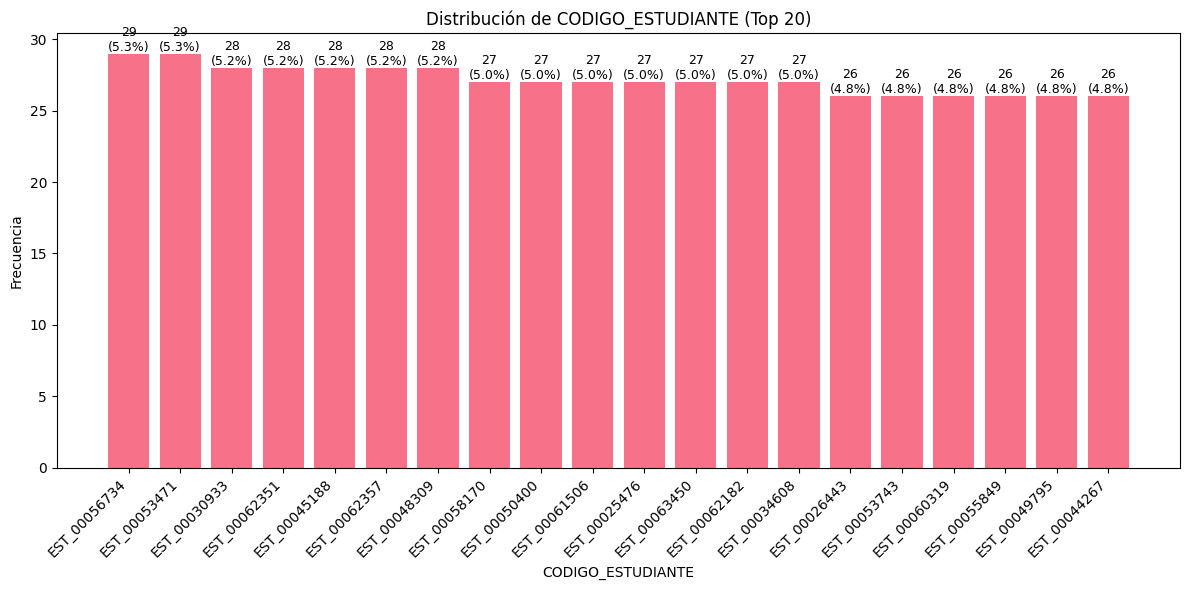

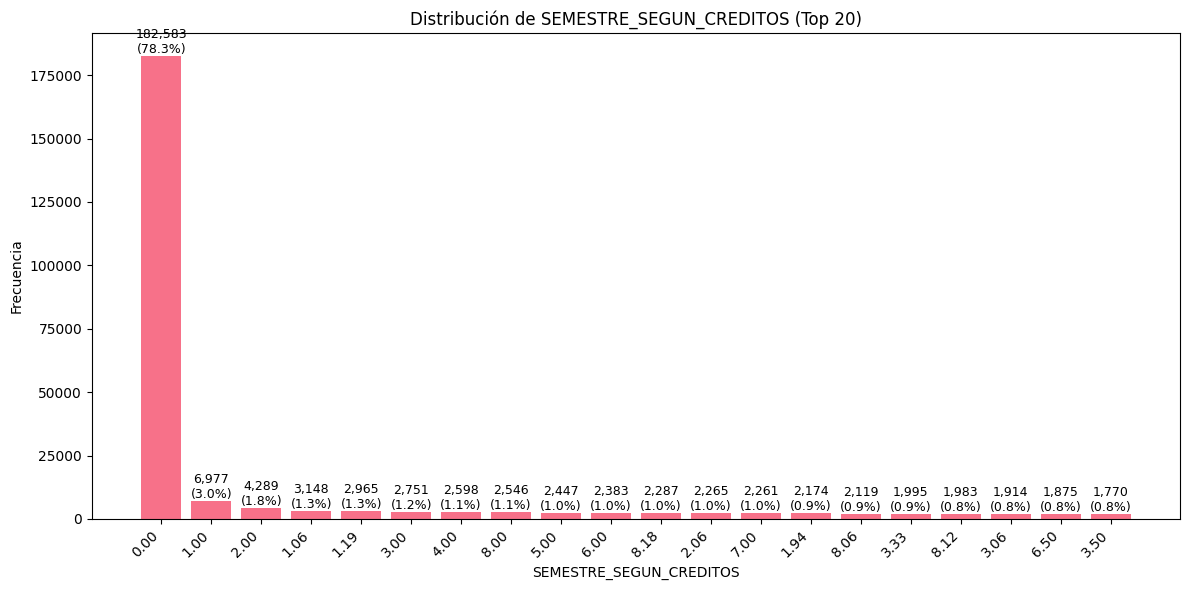

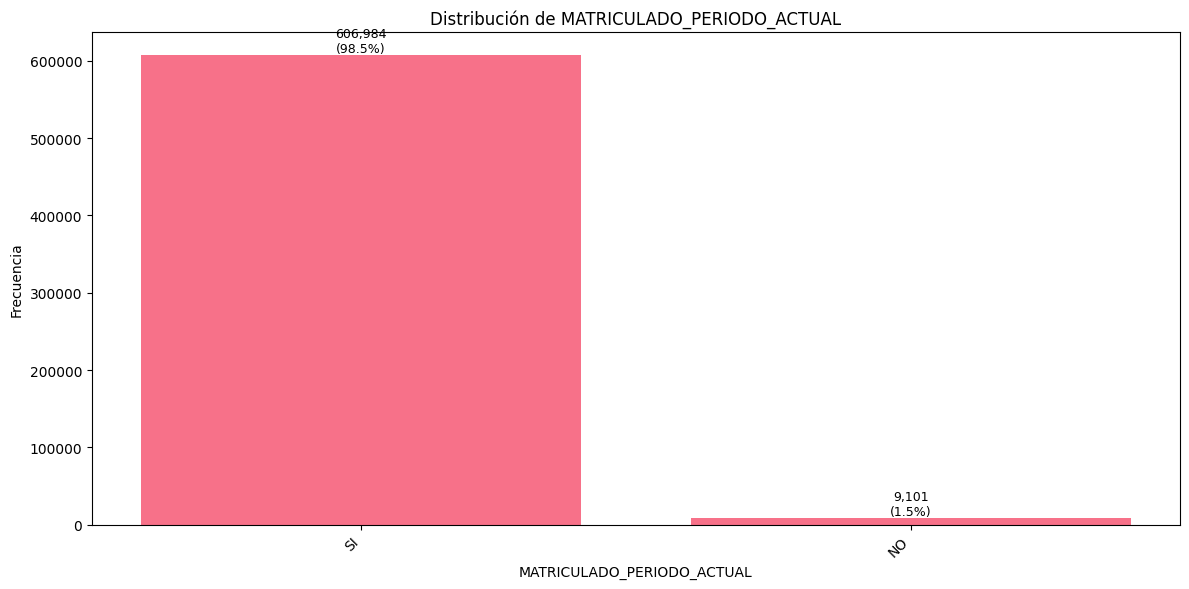

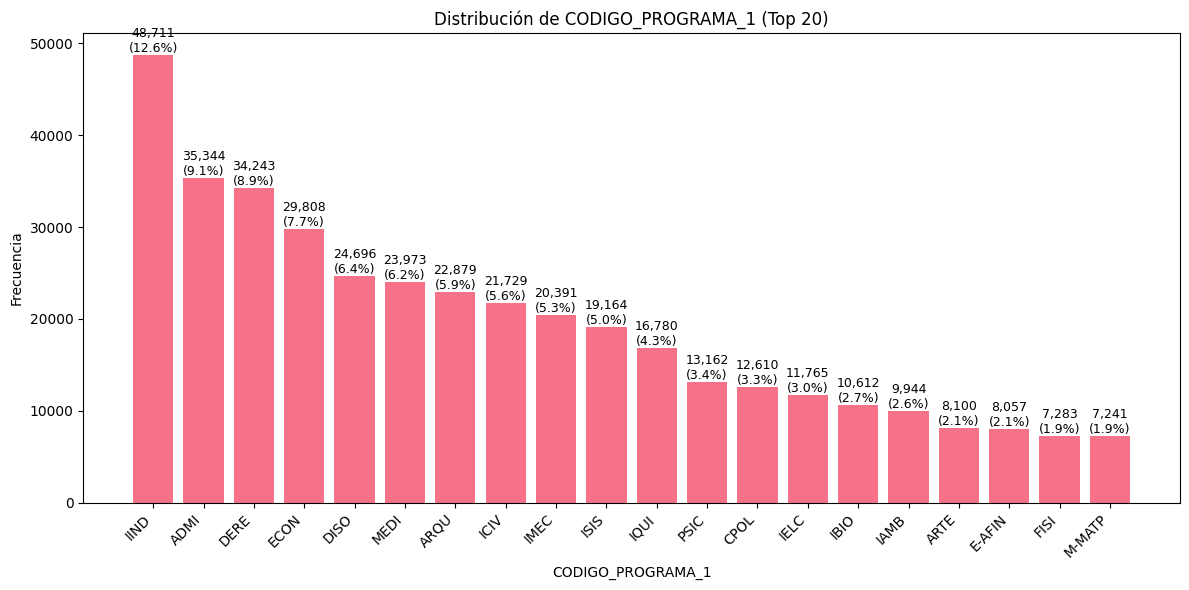

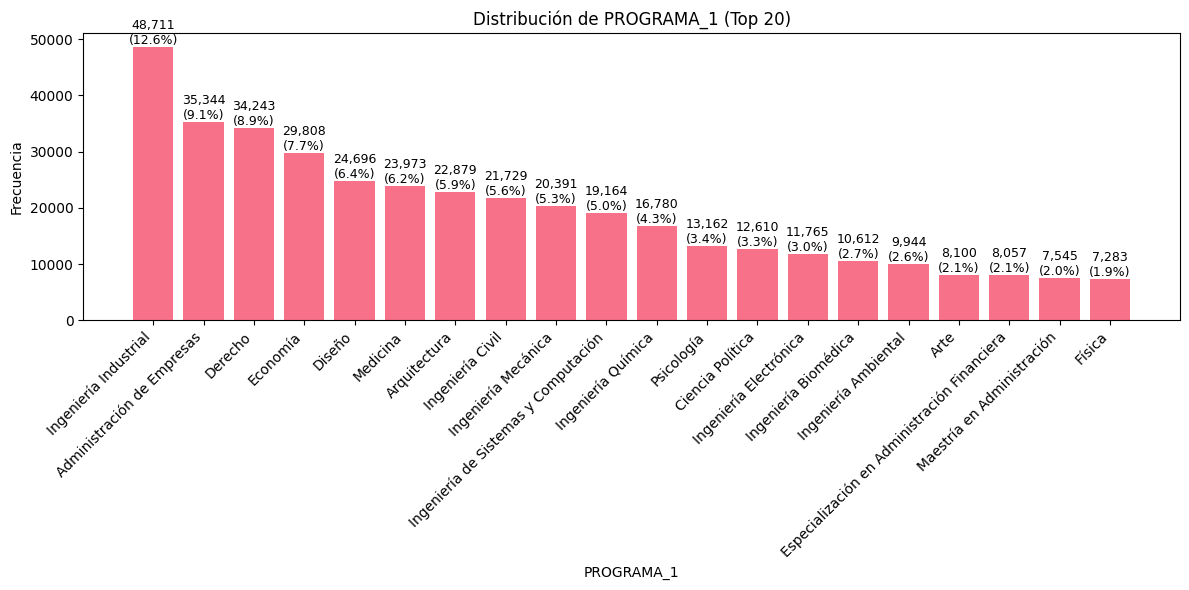

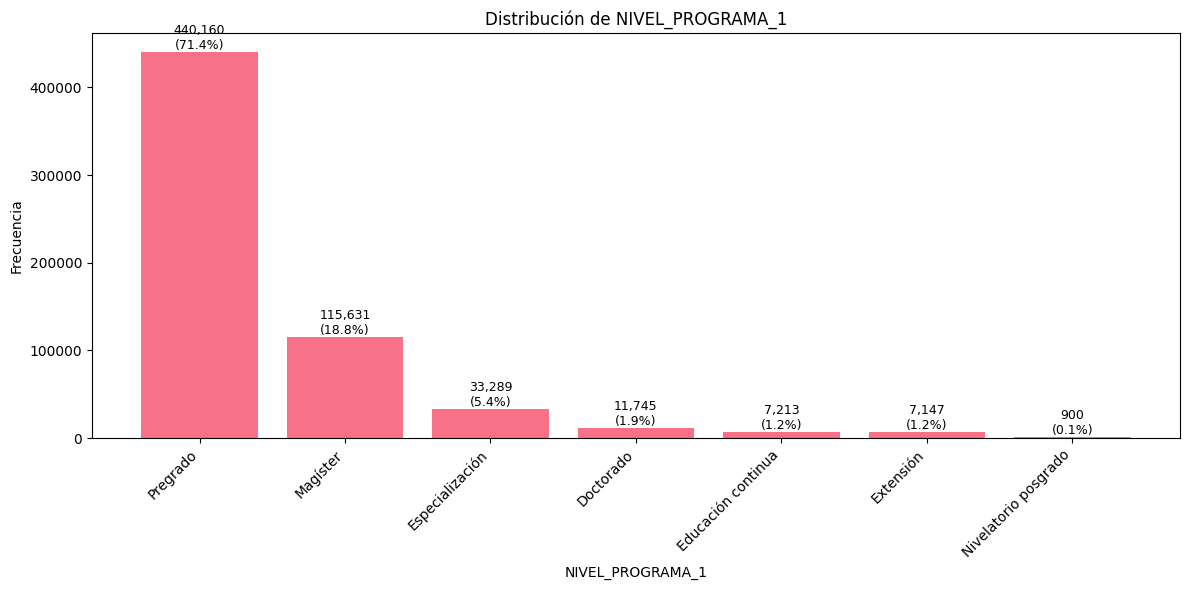

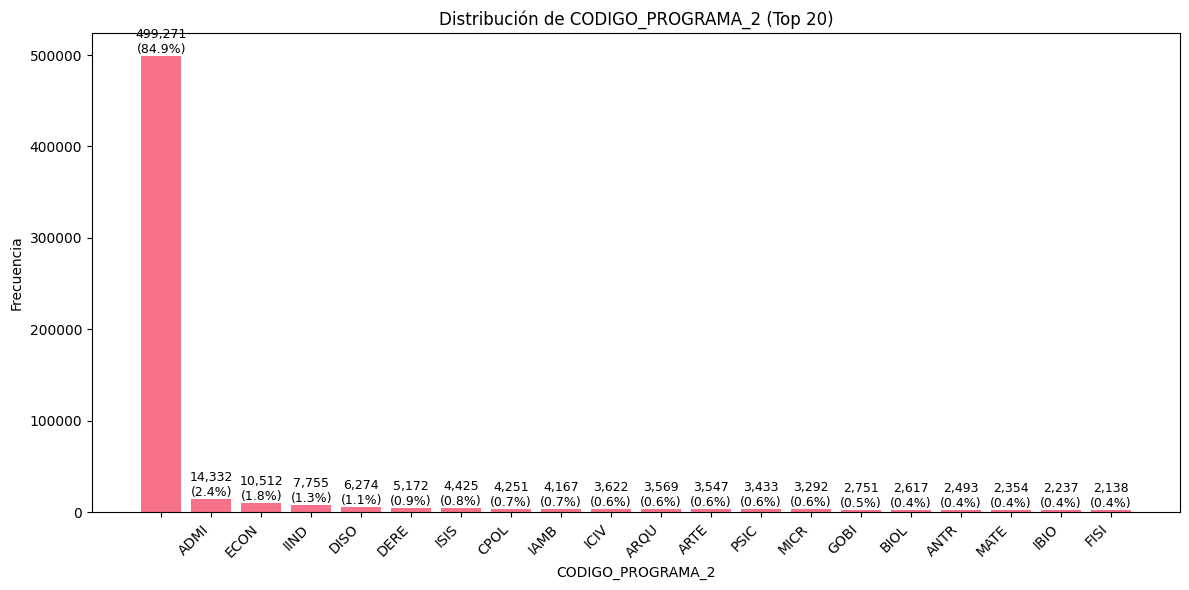

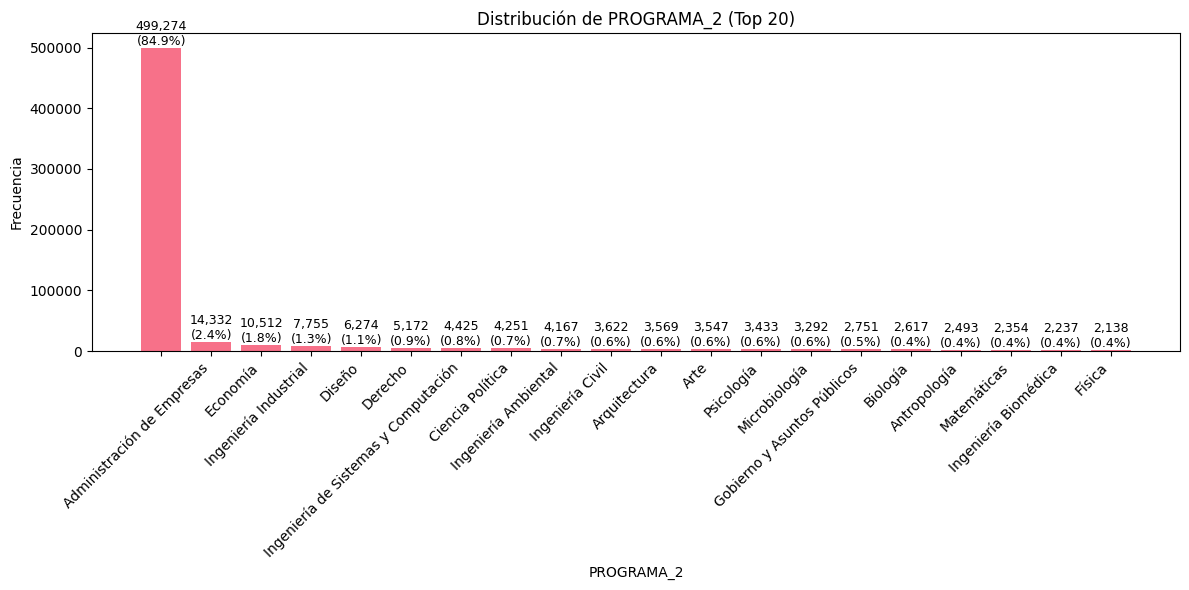

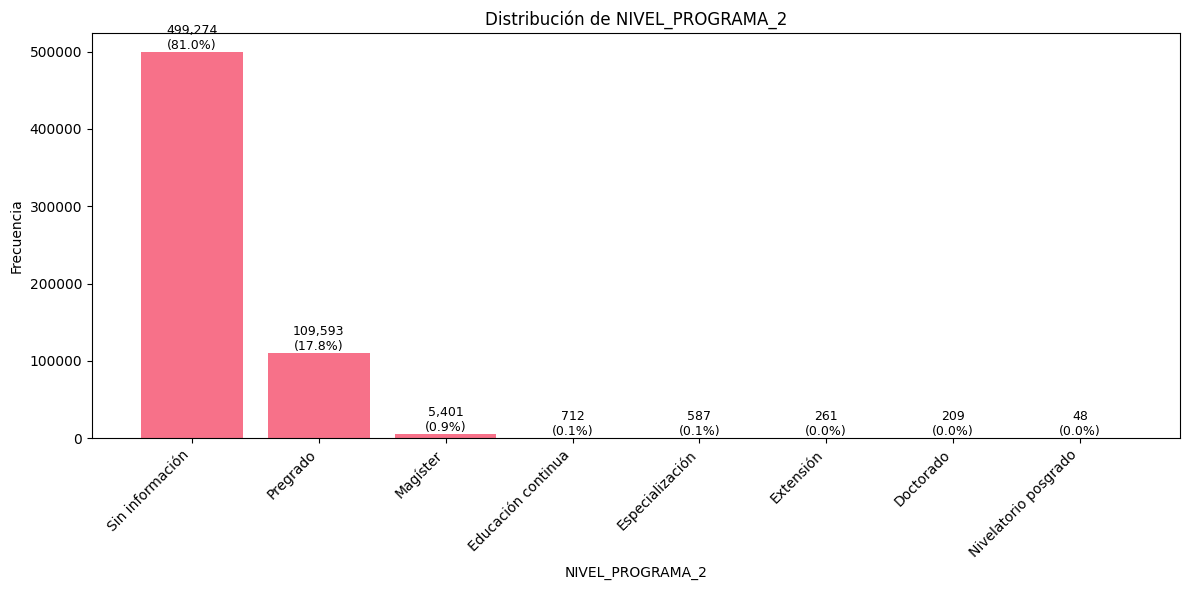

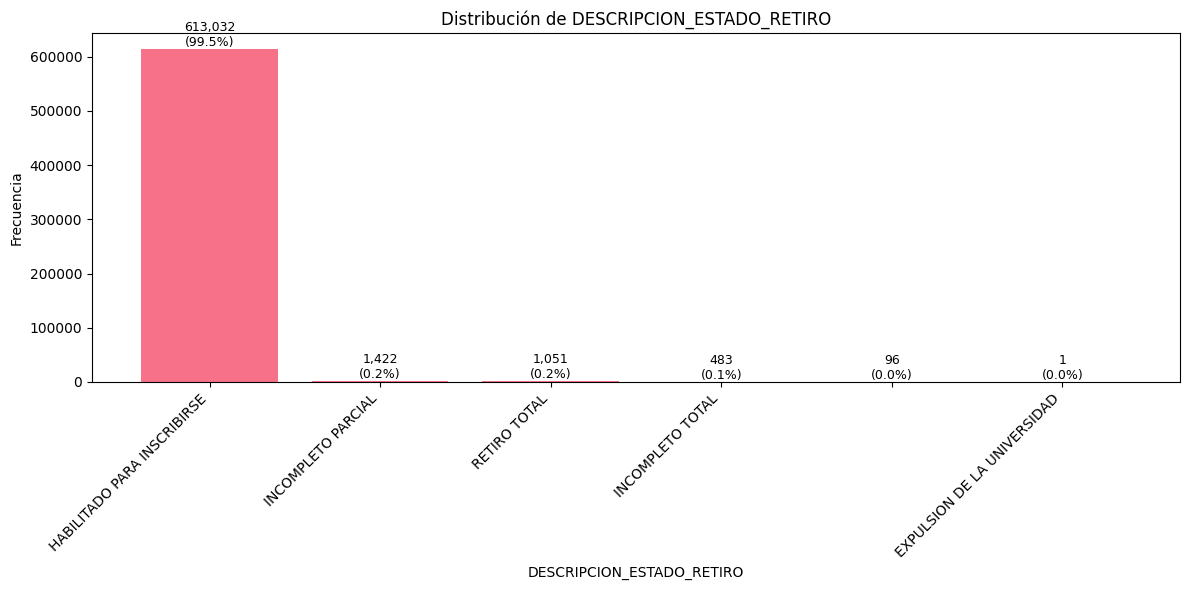

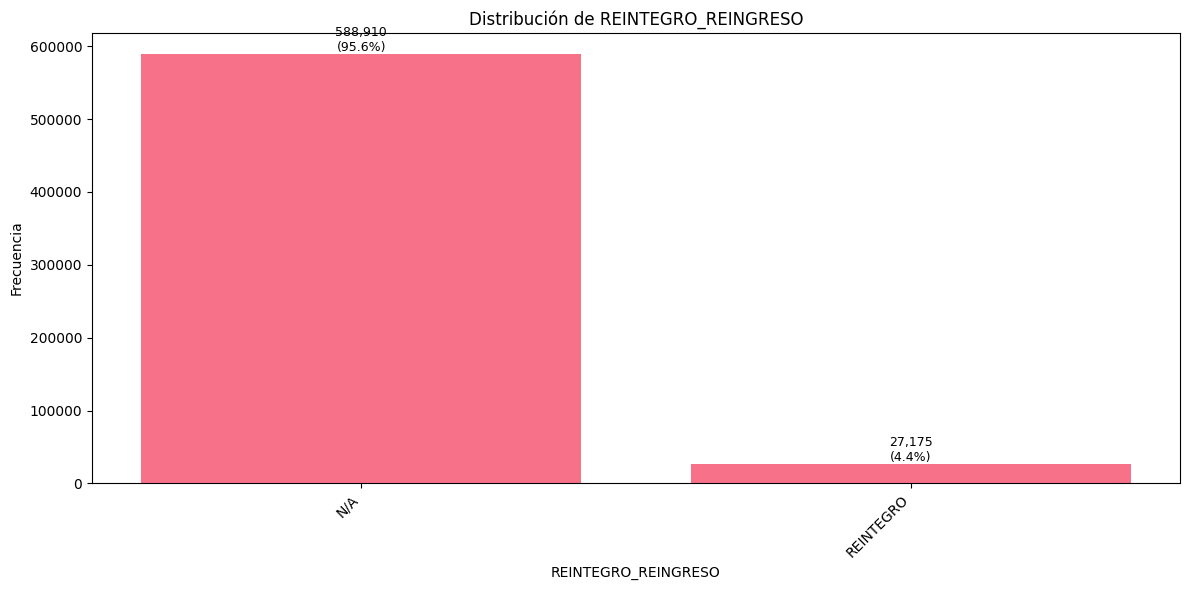

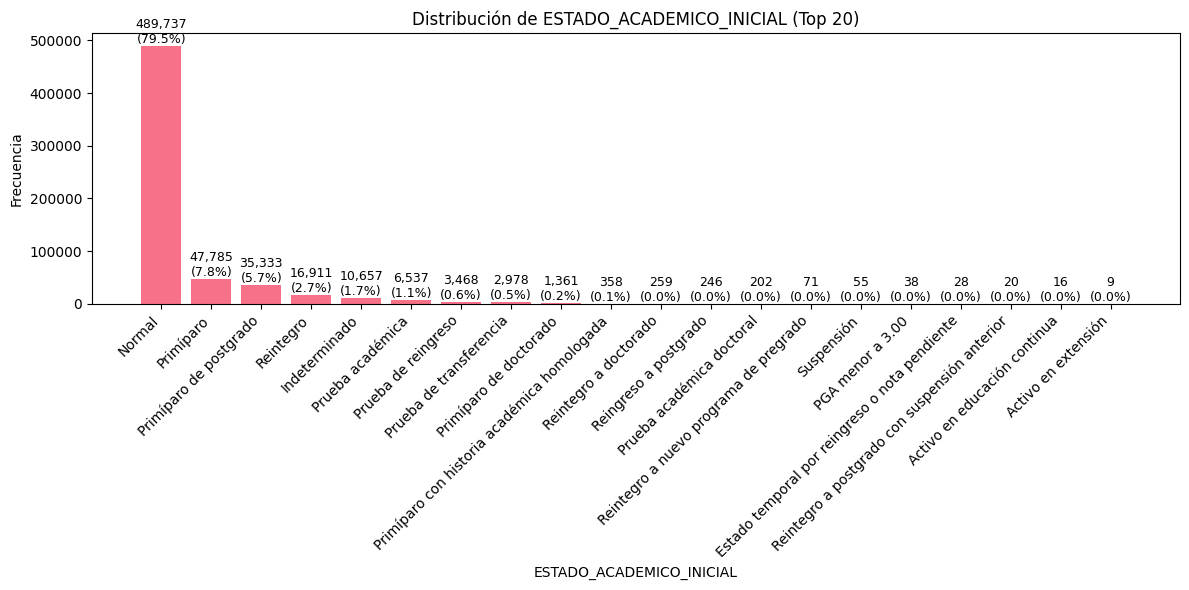

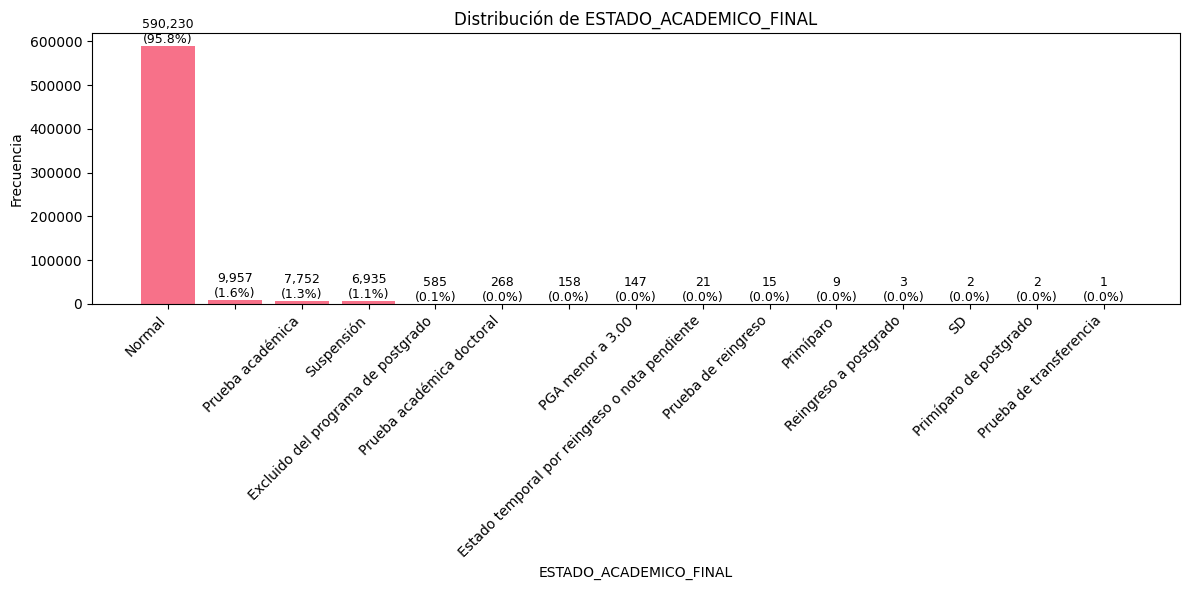

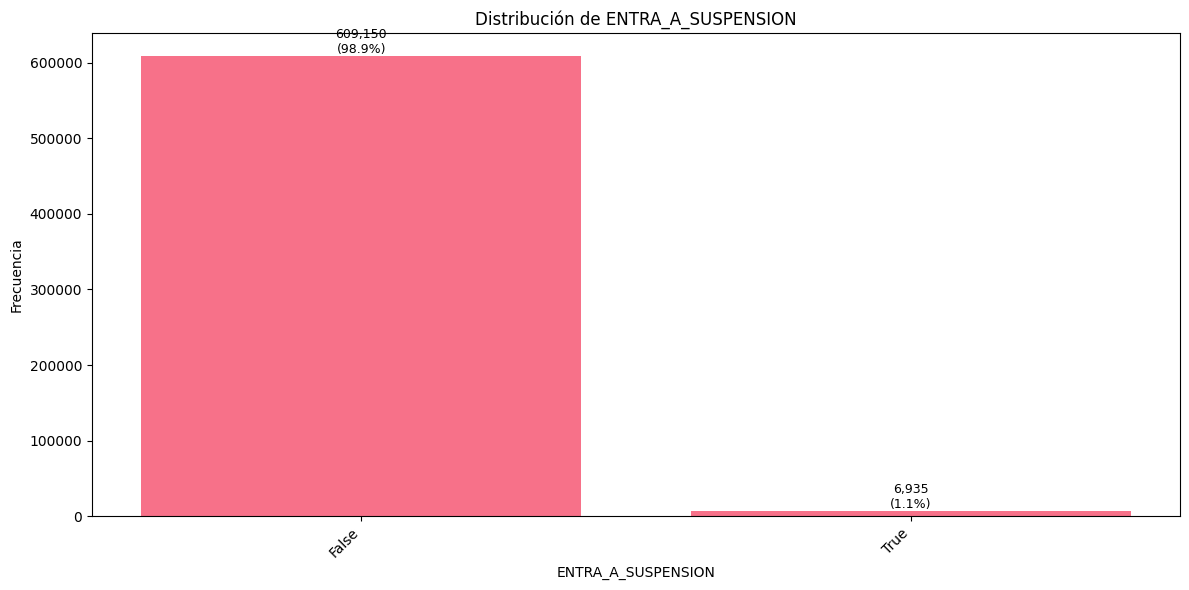

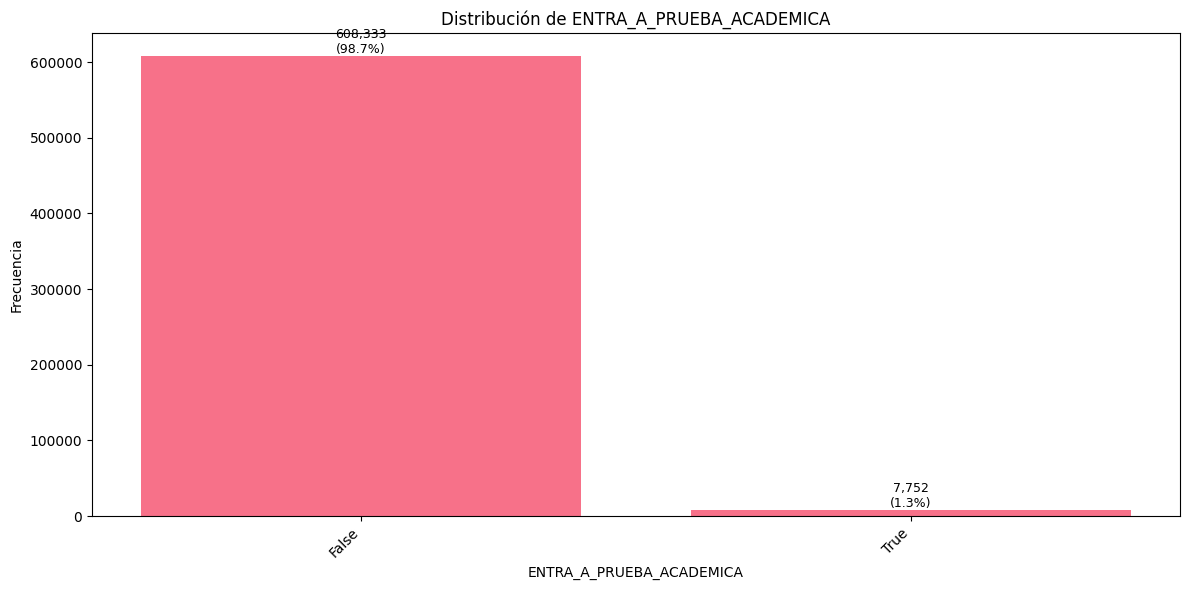

In [45]:
for col in cat_cols:
    value_counts = df[col].value_counts(dropna=False)
    if len(value_counts) > 20:
        value_counts = value_counts.head(20)
        title_suffix = " (Top 20)"
    else:
        title_suffix = ""
    percentages = (value_counts / value_counts.sum() * 100)
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(range(len(value_counts)), value_counts.values)
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9)
    ax.set_title(f'Distribución de {col}{title_suffix}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Hallazgos Clave en las Variables

Del análisis de las distribuciones anteriores, identificamos:

**PERIODO:** Distribución aproximadamente uniforme. Los periodos intersemestrales tienen la mitad de registros que los semestrales debido a menor matrícula. Útil para segmentación temporal en el análisis de clusterización.

**CODIGO_ESTUDIANTE:** Identificador único, puede usarse como llave primaria para joins con otros datasets. Fundamental para asociar información del estudiante con su historial de materias y recomendaciones personalizadas.

**SEMESTRE_SEGUN_CREDITOS:** La categoría "0" (recién ingresados) domina la distribución. Variable crítica para recomendaciones académicas: estudiantes en semestres iniciales requieren diferentes patrones de carga crediticia que estudiantes avanzados.

**MATRICULADO_PERIODO_ACTUAL:** Fuerte desbalance (98% matriculados vs 1.5% no matriculados). No usar directamente en modelos. Analizar no matriculados por separado.

**CODIGO_PROGRAMA_1 / PROGRAMA_1:** Top 3: Ingeniería Industrial (12.6%), Administración (9.1%), Derecho (8.9%). El programa académico es esencial para la clusterización: diferentes carreras tienen estructuras curriculares distintas que afectan las recomendaciones de materias.

**NIVEL_PROGRAMA_1:** Pregrado 71.4%, Magíster 18.8%, Especialización 5.4%. El nivel del programa impacta directamente el número y tipo de créditos que se recomienda inscribir por semestre.

**Variables PROGRAMA_2:** 84.9% sin segundo programa. Todas las variables relacionadas serán descartadas.

**DESCRIPCION_ESTADO_RETIRO:** 99.5% "Habilitado para inscribirse". Pocos casos de retiro limitan su utilidad. Complementar con indicadores de desempeño académico.

*(4 variables adicionales analizadas en detalle en el reporte técnico)*


## Análisis Univariado - Variables Numéricas

In [46]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Variables numéricas encontradas: {len(num_cols)}")
print(num_cols)


Variables numéricas encontradas: 6
['PERIODO', 'PERIODO_ESTADO_ACADEMICO_INICIAL', 'PERIODO_ESTADO_ACADEMICO_FINAL', 'SUSPENSIONES_ACUMULADAS', 'PRUEBAS_ACADEMICAS_ACUMULADAS', 'INCOMPLETOS_TOTALES_ACUMULADOS']


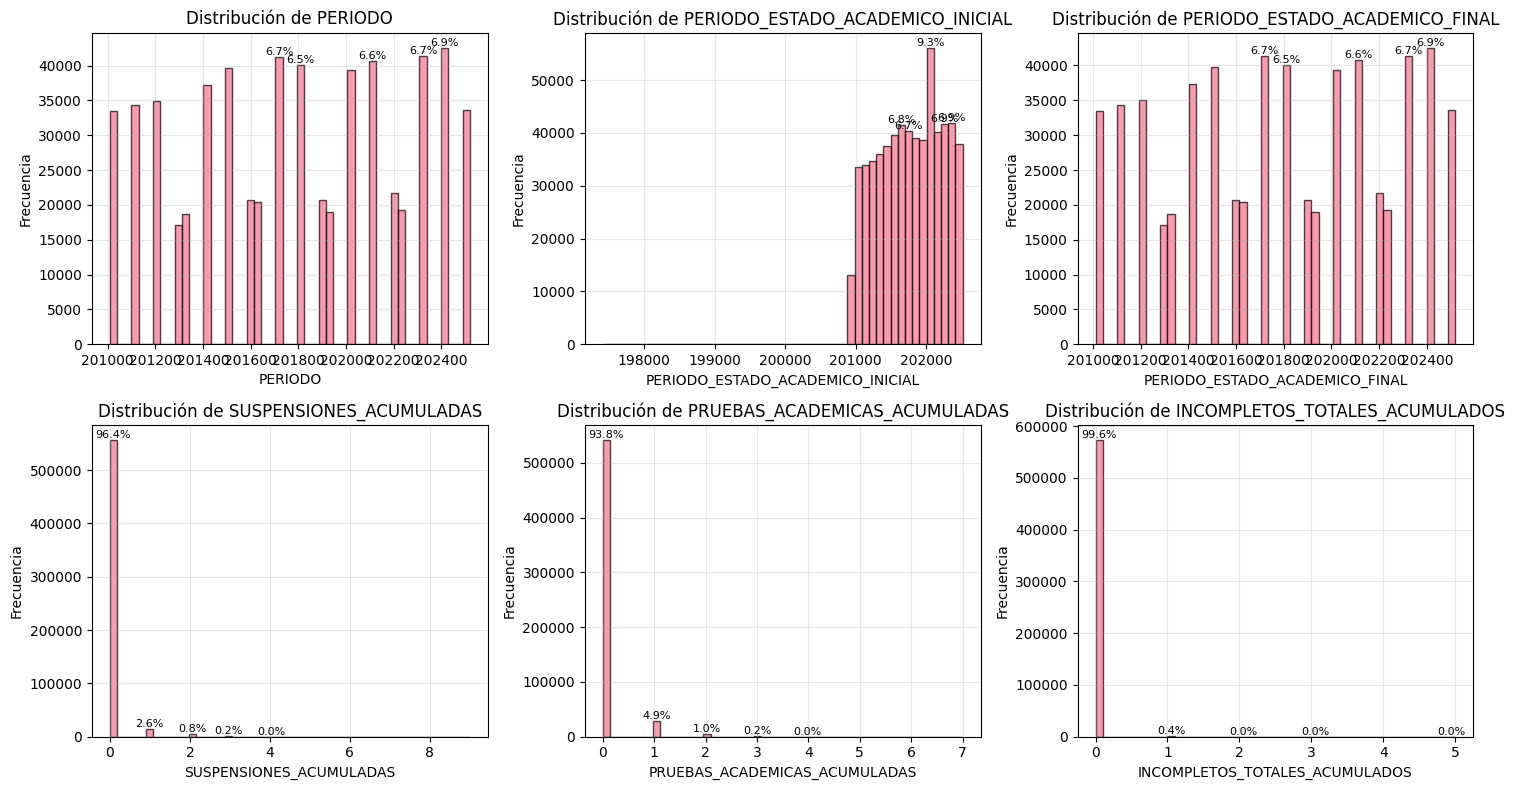

In [ ]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if len(num_cols) > 1 else [axes]
for idx, col in enumerate(num_cols):
    data = df[col].dropna()
    n, bins, patches = axes[idx].hist(data, bins=50, edgecolor='black', alpha=0.7)
    total = len(data)
    bin_heights = list(zip(n, range(len(n))))
    bin_heights.sort(reverse=True)
    top_bins = bin_heights[:min(5, len(bin_heights))]
    for height, bin_idx in top_bins:
        if height > 0:
            pct = (height / total) * 100
            bin_center = (bins[bin_idx] + bins[bin_idx + 1]) / 2
            axes[idx].text(bin_center, height, f'{pct:.1f}%',
                            ha='center', va='bottom', fontsize=8)
    axes[idx].set_title(f'Distribución de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frecuencia')
    axes[idx].grid(True, alpha=0.3)
for idx in range(len(num_cols), len(axes)):
    axes[idx].set_visible(False)
plt.tight_layout()
plt.show()


## Interpretando las Distribuciones Numéricas

Los histogramas nos revelan la forma en que se distribuyen los valores:

**Distribución normal (campana):** Los valores se concentran alrededor del promedio y disminuyen hacia los extremos. Típico en variables como calificaciones o promedios.

**Distribución sesgada (cola larga):** La mayoría tiene valores bajos o altos, con pocos casos extremos. Común en variables como número de suspensiones (la mayoría tiene cero, pocos tienen muchas).

**Distribución uniforme (plana):** Los valores se distribuyen parejos. Puede indicar una variable artificial o que agrupa casos de manera equilibrada en el tiempo.

**Valores atípicos:** Puntos muy alejados del grueso pueden ser errores de captura o casos excepcionales que merecen investigación aparte.


## Análisis Multivariado - Correlaciones

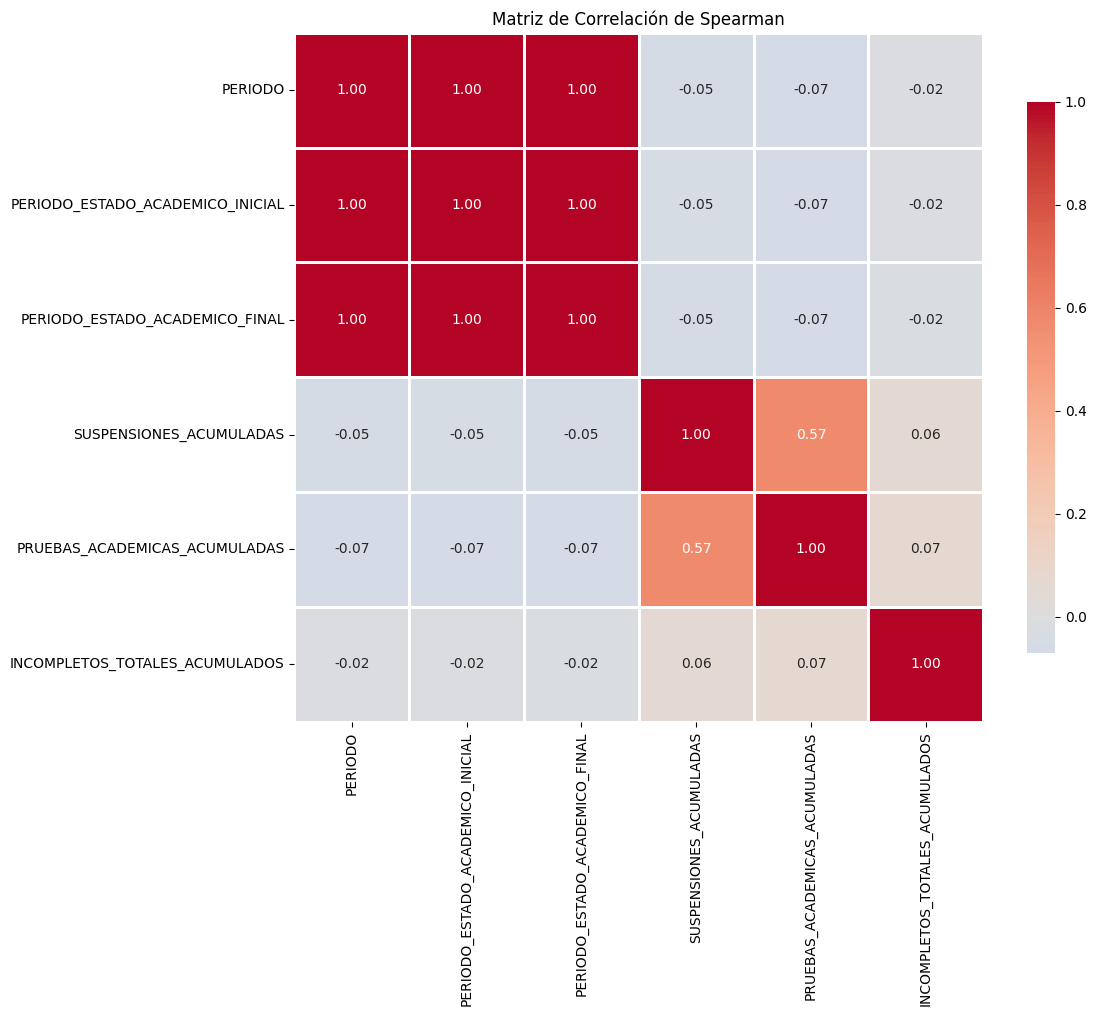

In [50]:
if len(num_cols) > 1:
    corr_matrix = df[num_cols].corr(method='spearman')
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación de Spearman')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables.")

## Relaciones Entre Variables

Las variables de periodo de estado académico inicial y final tienen correlación Spearman = 1.0 (esperado por naturaleza temporal). No se identificaron otras correlaciones fuertes entre variables numéricas.

**¿Por qué importan las correlaciones?**

- **Correlaciones esperadas** (como periodo_inicial y periodo_final): Validan que los datos tienen sentido interno.

- **Correlaciones inesperadas**: Pueden revelar relaciones causales o confusiones que debemos investigar.

- **Falta de correlaciones**: Nos dice que las variables aportan información independiente, útil para construir un modelo robusto sin redundancia.


## Análisis Multivariado - Pairplot

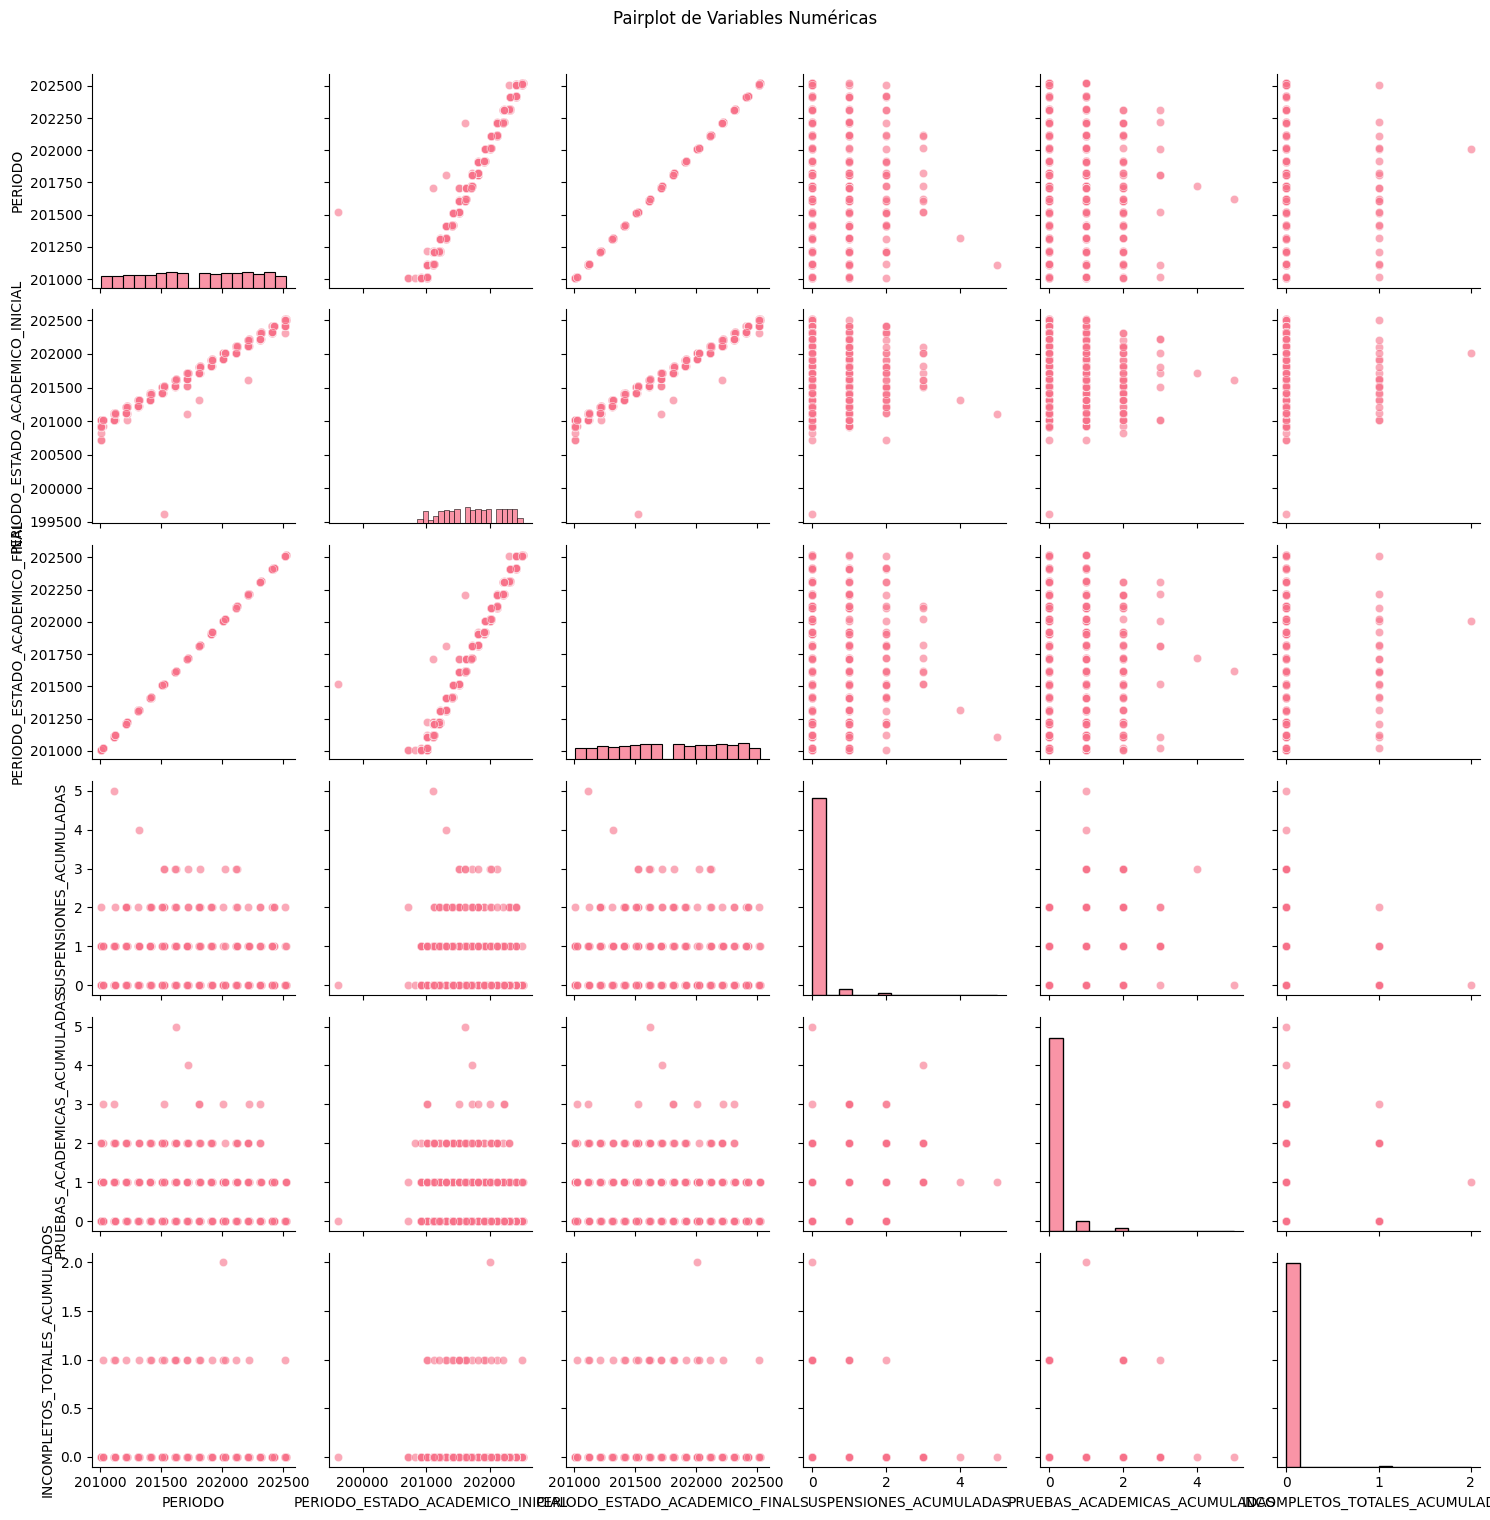

In [51]:
if len(num_cols) > 1:
    cols_to_plot = num_cols[:6]
    sample_size = min(5000, len(df))
    df_sample = df[cols_to_plot].sample(n=sample_size, random_state=42)
    sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot de Variables Numéricas', y=1.01)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables.")

## Visualización Multivariada: El Panorama Completo

El pairplot nos permite ver todas las combinaciones de variables numéricas simultáneamente:

**Los diagonales** muestran la distribución individual de cada variable (histogramas).

**Los gráficos de dispersión** revelan relaciones entre pares de variables:
- Puntos formando una línea = correlación fuerte
- Puntos en grupos = clusters naturales (¡exactamente lo que buscamos para el proyecto!)
- Puntos dispersos sin patrón = variables independientes

Esta visualización es especialmente útil para identificar si existen grupos naturales de estudiantes que podríamos usar como base para el clustering jerárquico.


## Análisis Multivariado - Variables Categóricas

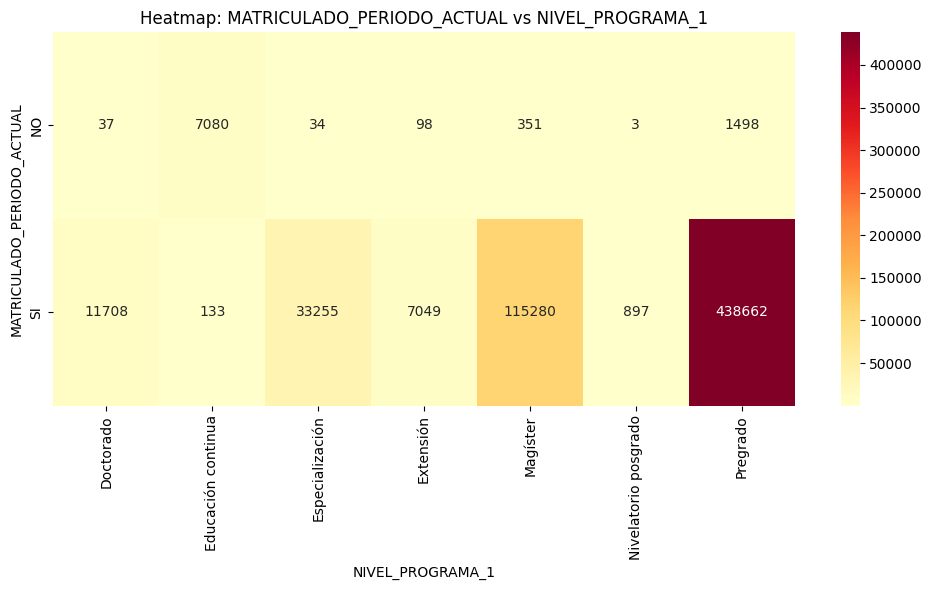

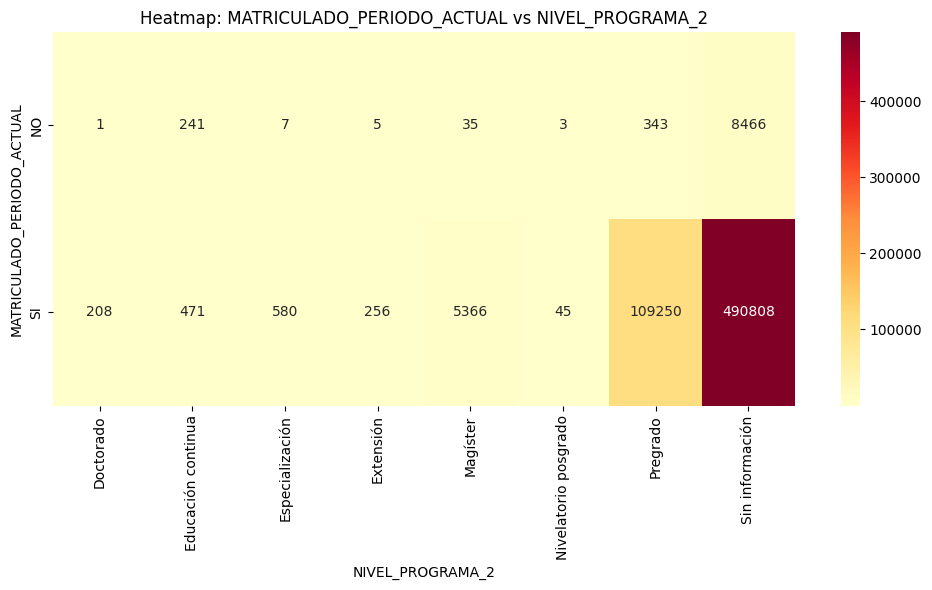

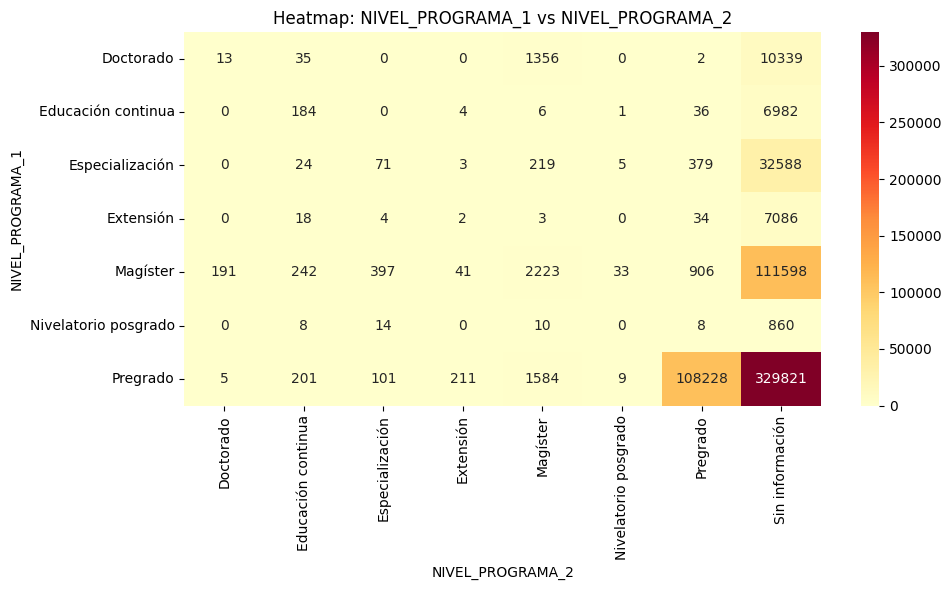

In [52]:
cat_cols_filtered = [col for col in cat_cols if df[col].nunique() < 20][:3]
if len(cat_cols_filtered) >= 2:
    for i in range(len(cat_cols_filtered)):
        for j in range(i+1, len(cat_cols_filtered)):
            col1, col2 = cat_cols_filtered[i], cat_cols_filtered[j]
            crosstab = pd.crosstab(df[col1], df[col2], margins=True)
            crosstab_no_margins = pd.crosstab(df[col1], df[col2])
            plt.figure(figsize=(10, 6))
            sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd')
            plt.title(f'Heatmap: {col1} vs {col2}')
            plt.tight_layout()
            plt.show()
else:
    print("No hay suficientes variables.")

## Conclusiones del Análisis Exploratorio

### Variables a descartar

Todas relacionadas con PROGRAMA_2 (>81% nulos) y REINTEGRO_REINGRESO (95% N/A).

### Variables clave para clusterización

PROGRAMA_1, SEMESTRE_SEGUN_CREDITOS, ESTADO_ACADEMICO (inicial/final), y las variables acumuladas de riesgo académico son fundamentales para generar clusters significativos de estudiantes con perfiles similares.

### Desbalance de clases

La mayoría de variables categóricas presentan sesgos significativos. No pueden usarse directamente en modelos sin tratamiento previo. Definir grupos focales específicos para análisis.

### Estrategia recomendada

(1) Segmentar por nivel de programa y potencialmente por carrera; (2) Analizar trayectorias de estudiantes en estados críticos para identificar patrones de riesgo; (3) Aplicar técnicas de balanceo de clases; (4) Imputar o eliminar valores faltantes según objetivos del proyecto de recomendación.

### Impacto para el Proyecto

Este análisis exploratorio nos permite:

1. **Identificar qué variables usar**: Sabemos cuáles aportan información útil y cuáles descartar.
2. **Detectar problemas de calidad**: Valores nulos, atípicos y desbalances que debemos corregir.
3. **Entender las relaciones**: Cómo las variables se relacionan entre sí y con el rendimiento académico.
4. **Validar viabilidad**: Confirmar que existen patrones diferenciables que justifican el clustering.

Los insights obtenidos guiarán las decisiones de preprocesamiento y la construcción del modelo de recomendaciones académicas.
